# ARIMA MODEL

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
df1 = df1.set_index('Country/Region')
df1

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.000000,65.000000,0,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,NaN,0.186360,6.613081,0,0,0,0,0,0,0,...,235,235,235,246,251,251,251,251,251,251
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,106,122,128,130,167,184,197,209,212,222
Comoros,NaN,-11.645500,43.333300,0,0,0,0,0,0,0,...,11,11,11,11,11,34,34,78,78,87


In [5]:
india = df1.loc['India']
india = india.astype('float64')
india = india.drop(['Lat','Long'])

india = india.dropna()
india.tail(10)
# india = pd.DataFrame(india)
india

1/22/20         0.0
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
5/20/20    112028.0
5/21/20    118226.0
5/22/20    124794.0
5/23/20    131423.0
5/24/20    138536.0
Name: India, Length: 124, dtype: float64

In [6]:
# y = np.exp(india)

y = india.copy()
y

1/22/20         0.0
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
5/20/20    112028.0
5/21/20    118226.0
5/22/20    124794.0
5/23/20    131423.0
5/24/20    138536.0
Name: India, Length: 124, dtype: float64

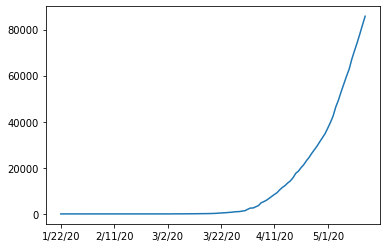

In [31]:
y.plot()
pyplot.show()

In [32]:
y.kurtosis()

3.065509052255572

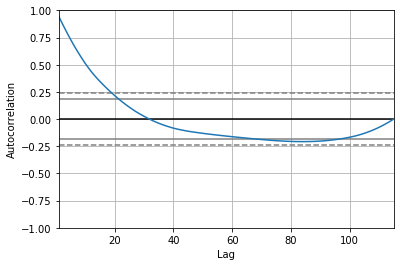

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(india)
pyplot.show()

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.India   No. Observations:                  114
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -792.103
Method:                       css-mle   S.D. of innovations            247.080
Date:                Sun, 17 May 2020   AIC                           1598.205
Time:                        05:27:34   BIC                           1617.358
Sample:                    01-23-2020   HQIC                          1605.978
                         - 05-15-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1689.4734   1635.416      1.033      0.302   -1515.883    4894.829
ar.L1.D.India     0.4071      0.092      4.434      0.000       0.227       0.587
ar.L2.D.India     0.4532      0.099     

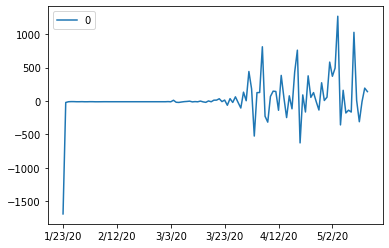

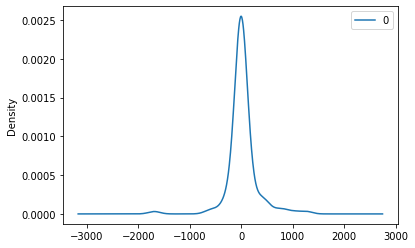

                 0
count   114.000000
mean     27.225466
std     292.636116
min   -1689.473421
25%     -11.766752
50%     -11.063171
75%      46.098709
max    1267.931099


In [34]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(india, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=3636.486486, expected=4778.000000
predicted=4841.706666, expected=5311.000000
predicted=5380.881579, expected=5916.000000
predicted=5992.831169, expected=6725.000000
predicted=6811.217949, expected=7598.000000
predicted=7694.177215, expected=8446.000000
predicted=8551.575000, expected=9205.000000
predicted=9318.641975, expected=10453.000000
predicted=10580.475610, expected=11487.000000
predicted=11625.397590, expected=12322.000000
predicted=12468.690476, expected=13430.000000
predicted=13588.000000, expected=14352.000000
predicted=14518.883721, expected=15722.000000
predicted=15902.712644, expected=17615.000000
predicted=17815.170455, expected=18539.000000
predicted=18747.303371, expected=20080.000000
predicted=20303.111111, expected=21370.000000
predicted=21604.835165, expected=23077.000000
predicted=23327.836957, expected=24530.000000
predicted=24793.763441, expected=26283.000000
predicted=26562.606383, expected=27890.000000
predicted=28183.578947, expected=29451.000000
pre

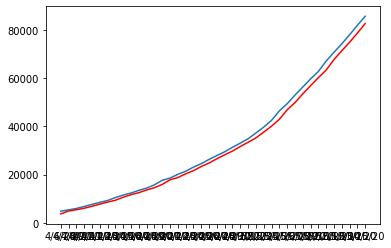

In [35]:
from sklearn.metrics import mean_squared_error
X = y
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [36]:
error = np.sqrt(error)
error

1986.5411474864388

In [37]:
# pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(X, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1571.914, BIC=1582.824, Time=0.585 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1609.489, BIC=1614.943, Time=0.012 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1575.164, BIC=1583.346, Time=0.023 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1574.477, BIC=1582.659, Time=0.100 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1608.943, BIC=1611.671, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1572.972, BIC=1586.609, Time=0.321 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1569.423, BIC=1583.060, Time=0.284 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1570.032, BIC=1580.942, Time=0.168 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1570.475, BIC=1586.839, Time=0.367 seconds
Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=1573.119, BIC=1589.

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load dataset
series = india.copy()
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X)
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=10)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 16
prediction = list()
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    print('2020-05-%d: %f' % (day, inverted))
    history.append(inverted)
#     predictions.append(inverted)
    day += 1

2020-05-16: 89653.316682
2020-05-17: 93556.890724
2020-05-18: 97494.722128
2020-05-19: 101466.810892
2020-05-20: 105473.157018
2020-05-21: 109513.760504
2020-05-22: 113588.621351
2020-05-23: 117697.739560
2020-05-24: 121841.115129
2020-05-25: 126018.748059


# SARIMAX MODEL

In [9]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,2,2),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5122      0.265     -1.930      0.054      -1.033       0.008
ma.L1         -0.0866      0.266     -0.326      0.744      -0.607       0.434
ma.L2          0.0397      0.150      0.265      0.791      -0.254       0.333
ar.S.L12      -0.4731      0.125     -3.780      0.000      -0.718      -0.228
sigma2      1.112e+05   1.13e+04      9.810      0.000     8.9e+04    1.33e+05


In [8]:

y.index = pd.date_range(start = y.index[0], end = y.index[-1], freq = 'D')
y.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24'],
              dtype='datetime64[ns]', length=124, freq='D')

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

In [10]:
import statsmodels.api as sm
d = sm.tsa.seasonal_decompose(y, model = 'mul')
d.plot();

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

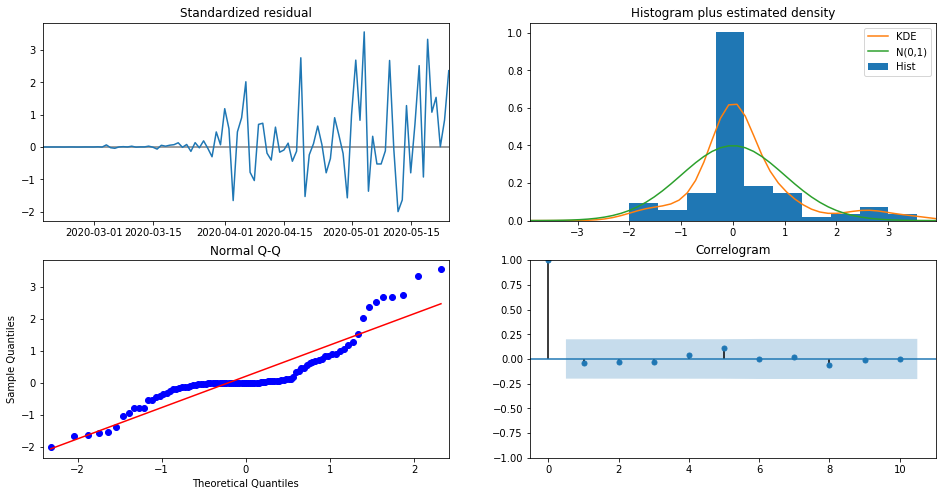

In [12]:
import matplotlib.pyplot as plt
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [13]:
y = pd.DataFrame(y)
y = y.reset_index()
y['index'] = pd.to_datetime(y['index'])
# y = y.drop(columns = ['level_0'])
y = y.rename(columns = {'index':'ds', 'India':'y'}).set_index('ds')

y['2020':]

,y
ds,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-20,112028.0
2020-05-21,118226.0
2020-05-22,124794.0


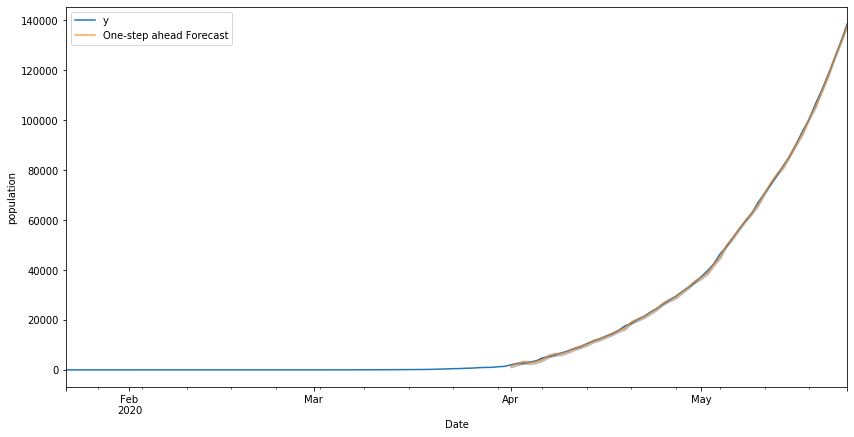

In [16]:
pred = results.get_prediction(start=pd.to_datetime('4/1/20'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

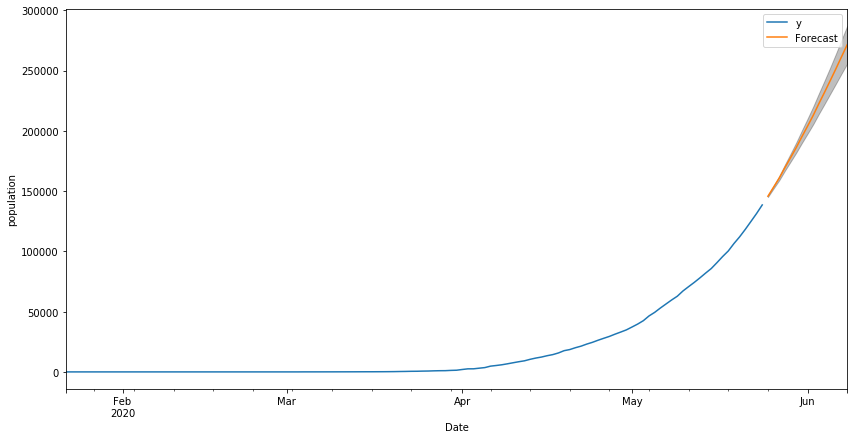

In [18]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = y['2020':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

In [19]:
pred_ci.tail(15)

,lower India,upper India
2020-05-25,145089.729166,146396.849171
2020-05-26,152133.737800,154383.834988
2020-05-27,158967.460880,162566.351874
2020-05-28,166896.392543,171954.363102
2020-05-29,174339.742206,181055.609097
2020-05-30,181803.701894,190310.486704
2020-05-31,189882.452953,200324.563494
2020-06-01,197580.111011,210081.805006
2020-06-02,205445.590874,220128.746710
2020-06-03,214037.086522,231014.746913


In [20]:
pred_uc.predicted_mean

2020-05-25    145743.289168
2020-05-26    153258.786394
2020-05-27    160766.906377
2020-05-28    169425.377823
2020-05-29    177697.675652
2020-05-30    186057.094299
2020-05-31    195103.508224
2020-06-01    203830.958009
2020-06-02    212787.168792
2020-06-03    222525.916718
2020-06-04    231943.377330
2020-06-05    241576.806060
2020-06-06    251372.870443
2020-06-07    261416.071942
2020-06-08    271382.018174
Freq: D, dtype: float64

# Holt Winter’s Exponential Smoothing (HWES)

In [27]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from random import random
# # contrived dataset
# # data = [x + random() for x in range(1, 100)]
# # fit model
# model = ExponentialSmoothing(y)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.forecast(steps = 2)
# print(yhat)


In [29]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AR(y)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(y), len(y))
print(yhat)

2020-05-11    71271.632052
Freq: D, dtype: float64


D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
D:\

In [29]:
# # VAR example
# from statsmodels.tsa.vector_ar.var_model import VAR
# from random import random
# # contrived dataset with dependency
# # data = list()
# # for i in range(100):
# #     v1 = i + random()
# #     v2 = v1 + random()
# #     row = [v1, v2]
# #     data.append(row)
# # fit model
# model = VAR(data)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.forecast(model_fit.y, steps=1)
# print(yhat)

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


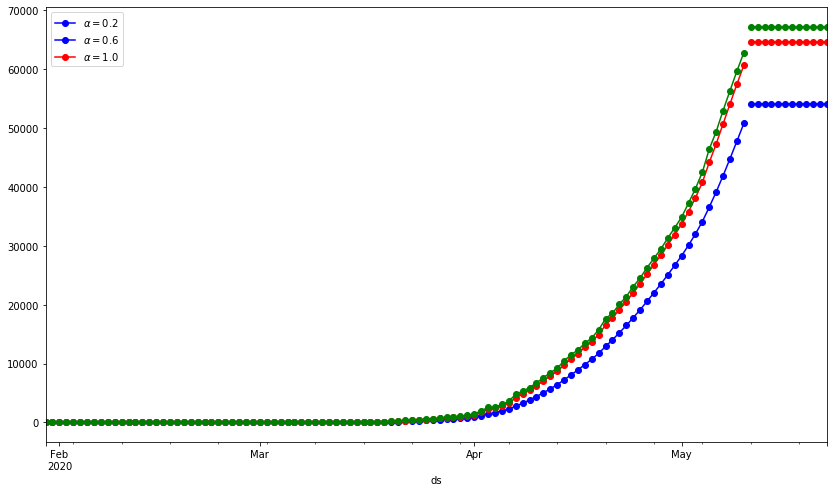

In [30]:
#SES

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(y).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(y).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(y).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


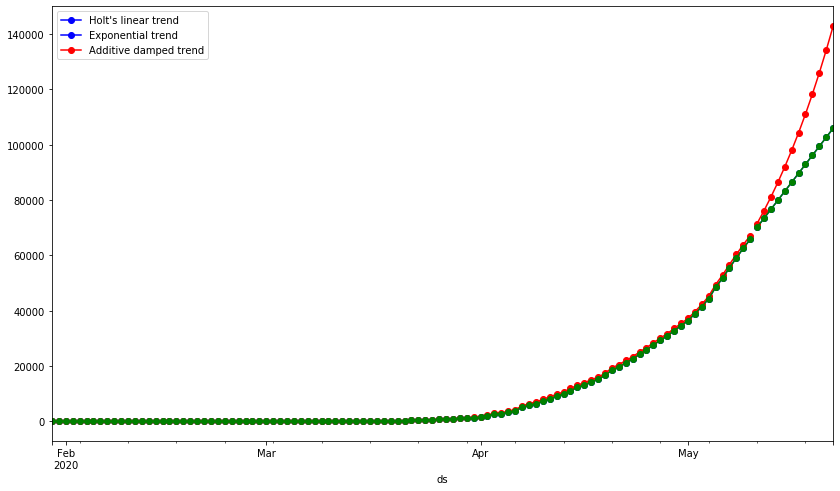

In [31]:
#holts method

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = Holt(y).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(y, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(y, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:894: RuntimeWarning: invalid value encountered in double_scalars
  lvls[i] = y_alpha[i - 1] / s[i - 1] + \
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:894: RuntimeWarning: divide by zero encountered in dou

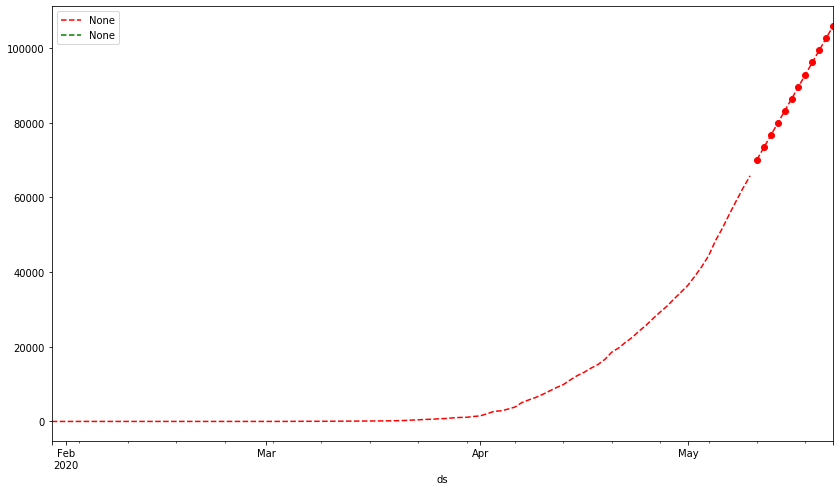

In [32]:
#holts winter method
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# fit1 = ExponentialSmoothing(y, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(y, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
# fit3 = ExponentialSmoothing(y, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(y, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
# print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")